In [2]:
from pymongo import MongoClient
client = MongoClient("mongodb://localhost:27017/")
db = client.test_database
collection = db.crypto_collection

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
import os
import dash
import dash_core_components as dcc
import dash_html_components as html
import pandas as pd
#import cdata.mongodb as mod
import plotly.graph_objs as go

## Hyperparameters

In [5]:
PRODUCT_ID = "ETH-USD"
SHOW_DATA = True

In [6]:
collection.count()

323478

In [7]:
collection.count({"type":"ticker"})

2316

In [8]:
ticker = collection.find_one({"type":"ticker", "product_id":PRODUCT_ID})

In [9]:
if SHOW_DATA == True:
    print(ticker)

{'_id': ObjectId('5f2e6756962d5662c066d7d4'), 'type': 'ticker', 'sequence': 9933459780, 'product_id': 'ETH-USD', 'price': '379.1', 'open_24h': '395.71000000', 'volume_24h': '233259.20714581', 'low_24h': '362.88000000', 'high_24h': '398.05000000', 'volume_30d': '5390577.96494267', 'best_bid': '379.08', 'best_ask': '379.10', 'side': 'buy', 'time': '2020-08-08T08:50:10.572680Z', 'trade_id': 61514684, 'last_size': '0.04855892'}


In [10]:
if SHOW_DATA == True:
    print(list(ticker.keys()))

['_id', 'type', 'sequence', 'product_id', 'price', 'open_24h', 'volume_24h', 'low_24h', 'high_24h', 'volume_30d', 'best_bid', 'best_ask', 'side', 'time', 'trade_id', 'last_size']


In [11]:
df = pd.DataFrame.from_dict(collection.find({"type":"ticker"}))

In [12]:
if SHOW_DATA == True:
    print(df.head())

                        _id    type     sequence product_id     price  \
0  5f2e6755962d5662c066d7d0  ticker   2217288584    ETH-BTC    0.0327   
1  5f2e6756962d5662c066d7d2  ticker   4632573187    ETH-EUR    321.95   
2  5f2e6756962d5662c066d7d4  ticker   9933459780    ETH-USD     379.1   
3  5f2e6757962d5662c066d7d7  ticker  15606127217    BTC-USD  11600.77   
4  5f2e6757962d5662c066d7dc  ticker   4632573325    ETH-EUR    321.95   

         open_24h       volume_24h         low_24h        high_24h  \
0      0.03343000   31330.14609292      0.03176000      0.03364000   
1    335.15000000   38064.01920198    308.00000000    336.92000000   
2    395.71000000  233259.20714581    362.88000000    398.05000000   
3  11825.01000000   20586.56463325  11350.00000000  11852.37000000   
4    335.15000000   38066.69404025    308.00000000    336.92000000   

         volume_30d  best_bid  best_ask side                         time  \
0   899284.26983724   0.03269   0.03270  buy  2020-08-08T08:50:

In [13]:
if SHOW_DATA == True:
    df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2316 entries, 0 to 2315
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   _id         2316 non-null   object
 1   type        2316 non-null   object
 2   sequence    2316 non-null   int64 
 3   product_id  2316 non-null   object
 4   price       2316 non-null   object
 5   open_24h    2316 non-null   object
 6   volume_24h  2316 non-null   object
 7   low_24h     2316 non-null   object
 8   high_24h    2316 non-null   object
 9   volume_30d  2316 non-null   object
 10  best_bid    2316 non-null   object
 11  best_ask    2316 non-null   object
 12  side        2316 non-null   object
 13  time        2316 non-null   object
 14  trade_id    2316 non-null   int64 
 15  last_size   2316 non-null   object
dtypes: int64(2), object(14)
memory usage: 289.6+ KB


In [14]:
df['date_time_float'] = pd.to_datetime(df.time).astype(int) / 10**9

In [15]:
df.price = df.price.astype(float)
df.open_24h = df.open_24h.astype(float)
df.volume_24h = df.volume_24h.astype(float)
df.low_24h = df.low_24h.astype(float)
df.high_24h = df.high_24h.astype(float)
df.volume_30d = df.volume_30d.astype(float)
df.best_bid = df.best_bid.astype(float)
df.best_ask = df.best_ask.astype(float)
df.trade_id = df.trade_id.astype(int)
df.time = pd.to_datetime(df.time)

In [16]:
if SHOW_DATA == True:
    df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2316 entries, 0 to 2315
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   _id              2316 non-null   object             
 1   type             2316 non-null   object             
 2   sequence         2316 non-null   int64              
 3   product_id       2316 non-null   object             
 4   price            2316 non-null   float64            
 5   open_24h         2316 non-null   float64            
 6   volume_24h       2316 non-null   float64            
 7   low_24h          2316 non-null   float64            
 8   high_24h         2316 non-null   float64            
 9   volume_30d       2316 non-null   float64            
 10  best_bid         2316 non-null   float64            
 11  best_ask         2316 non-null   float64            
 12  side             2316 non-null   object             
 13  time             2

In [17]:
if SHOW_DATA == True:
    df.describe()

In [18]:
df.product_id.value_counts()

BTC-USD    1268
ETH-USD     639
ETH-EUR     293
ETH-BTC     116
Name: product_id, dtype: int64

In [19]:
coin = df.loc[df.product_id == PRODUCT_ID,:]
if SHOW_DATA == True:
    print(coin.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 639 entries, 2 to 2313
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype              
---  ------           --------------  -----              
 0   _id              639 non-null    object             
 1   type             639 non-null    object             
 2   sequence         639 non-null    int64              
 3   product_id       639 non-null    object             
 4   price            639 non-null    float64            
 5   open_24h         639 non-null    float64            
 6   volume_24h       639 non-null    float64            
 7   low_24h          639 non-null    float64            
 8   high_24h         639 non-null    float64            
 9   volume_30d       639 non-null    float64            
 10  best_bid         639 non-null    float64            
 11  best_ask         639 non-null    float64            
 12  side             639 non-null    object             
 13  time             63

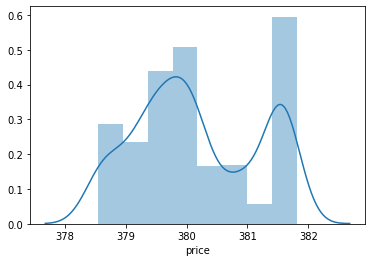

In [20]:
sns.distplot(coin.price)

In [21]:
coin.price.mean()

380.16167449139226

Check the distribution of time among data to see if the data are evenly spread

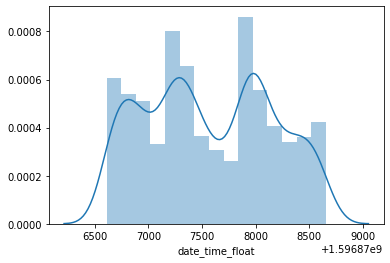

In [22]:
sns.distplot(df.date_time_float)

# Dash

## From Simple Tutorial on Dash
#### Working !!!

In [31]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
from jupyter_dash import JupyterDash
import pandas as pd

external_stylesheets = ['https://codepen.io/chriddyp/pen/bWLwgP.css']

app = JupyterDash(__name__, external_stylesheets=external_stylesheets)

# assume you have a "long-form" data frame
# see https://plotly.com/python/px-arguments/ for more options
df = coin
fig = px.scatter(df, x="date_time_float", y="price", color="side")

app.layout = html.Div(children=[
    html.H1(children=PRODUCT_ID + ' Trend'),

    html.Div(children='''
        Dash: A web application framework for Python.
    '''),

    dcc.Graph(
        id='graph',
        figure=fig
    )
])

app.run_server(mode='inline')

In [23]:
import plotly.express as px
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
# Load Data
df = px.data.tips()
# Build App
app = JupyterDash(__name__)
app.layout = html.Div([
    html.H1("JupyterDash Demo"),
    dcc.Graph(id='graph'),
    html.Label([
        "colorscale",
        dcc.Dropdown(
            id='colorscale-dropdown', clearable=False,
            value='plasma', options=[
                {'label': c, 'value': c}
                for c in px.colors.named_colorscales()
            ])
    ]),
])
# Define callback to update graph
@app.callback(
    Output('graph', 'figure'),
    [Input("colorscale-dropdown", "value")]
)
def update_figure(colorscale):
    return px.scatter(
        coin, x="date_time_float", y="price", color="side",
        color_continuous_scale=colorscale,
        render_mode="webgl", title="Tips"
    )
# Run app and display result inline in the notebook
app.run_server(mode='inline')